In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Global Protest Tracker new.csv')

In [3]:
data.head()

,Country,Protest Name,Start Date,Freedom Rating (Status),Triggers,Motivations,Peak Size,Key Participants,Duration,Outcomes,...,Active protests,Economic motivation?,Political motivation?,Corruption motivation?,Protests with a significant outcome,"Large protests (Over 100,000 protesting)",Violent government response,Long protests (more than 3 months),Coronavirus-related protests,percentage situations
0,Türkiye,Protest against removal of opposition mayor,24-Oct,Not Free,"Ahmet Özer, the mayor of Istanbul's Esenyurt d...",Denounce Özer's removal from office as a polit...,>100,Opposition,Active,No policy/leadership change,...,X,0,X,X,0,0,0,0,0,"10000,00%"
1,Mozambique,2024 general elections protest,24-Oct,Partly Free,"The opposition candidate, Venâncio Mondlane, c...","Protest the election results, which many belie...",">1,000",Opposition,Active,No policy/leadership change. Police violently ...,...,X,0,X,X,0,0,X,0,0,"100,00%"
2,Albania,Anti-Rama protests,24-Oct,Partly Free,Lawmakers of the conservative Democratic Party...,Call for Prime Minister Edi Rama to step down ...,">1,000",Supporters of the Democratic Party,Active,No policy/leadership change.,...,X,0,X,X,0,0,0,0,0,"100,00%"
3,Georgia,2024 election protests,24-Oct,Partly Free,Results of the parliamentary elections on Octo...,"Denounce the election results, which many—both...",">10,000","Opposition, general public",Active,No policy/leadership change. Three out of the ...,...,X,0,X,X,0,0,0,0,0,"1000,00%"
4,South Korea,Christian protest against LGBTQ+ rights,24-Oct,Free,"In July, the South Korean Supreme Court upheld...","Criticize the Supreme Court ruling, which prot...",">100,000",Christian groups,1 day,No policy/leadership change.,...,0,0,X,0,0,X,0,0,0,"10000,00%"


In [13]:
# Replace problematic values like "<100000" with a numeric estimate
data['percentage situations'] = data['percentage situations'].str.replace('<', '').replace('Unknown', np.nan)

# Remove commas and percentages
data['percentage situations'] = data['percentage situations'].str.replace(',', '').str.replace('%', '')

# Convert to numeric
data['percentage situations'] = pd.to_numeric(data['percentage situations'], errors='coerce')

# Check the unique values again
print(data['percentage situations'].unique())

[1.0000e+06 1.0000e+04 1.0000e+05 9.0000e+04 5.0000e+05 1.7000e+06
 5.7000e+05 7.0000e+04 2.4000e+06 7.0000e+05 1.0000e+02 3.0000e+04
 1.5000e+05 1.3000e+05 6.0000e+05 4.0000e+06 5.0000e+04 8.0000e+05
 2.0000e+06 2.0000e+04 6.0000e+04 3.0000e+05 5.0000e+06        nan
 2.0000e+05 4.0000e+05 2.5000e+05 1.7000e+05 1.5000e+04 2.5000e+06
 8.0000e+04 1.2000e+06 1.7000e+04 1.6500e+05 4.0000e+04 1.5000e+06
 1.8000e+05 2.2000e+05 3.0000e+06 7.5000e+05 2.5000e+04 7.0000e+06
 6.0000e+06 8.0000e+06 1.2500e+05 6.2500e+05 1.0000e+03 6.5000e+05
 3.7500e+05 1.2000e+05 4.5413e+08]


In [5]:
size_mapping = {'>100': 100, '>1,000': 1000, '>10,000': 10000, '>100,000': 100000}
data['Peak Size'] = data['Peak Size'].map(size_mapping)

In [6]:
region_counts = data['Country'].value_counts()

/tmp/ipykernel_5424/413107202.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.head(10).index, y=region_counts.head(10).values, palette='viridis')


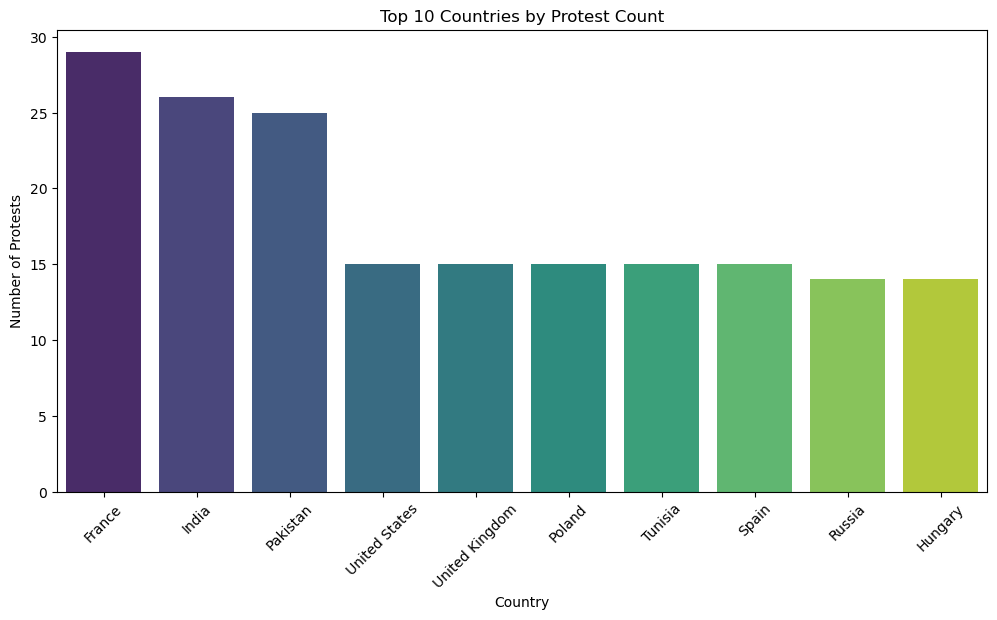

In [7]:
plt.figure(figsize=(12, 6))
sns.barplot(x=region_counts.head(10).index, y=region_counts.head(10).values, palette='viridis')
plt.title('Top 10 Countries by Protest Count')
plt.xlabel('Country')
plt.ylabel('Number of Protests')
plt.xticks(rotation=45)
plt.show()

In [8]:
motivations = data['Motivations'].value_counts()


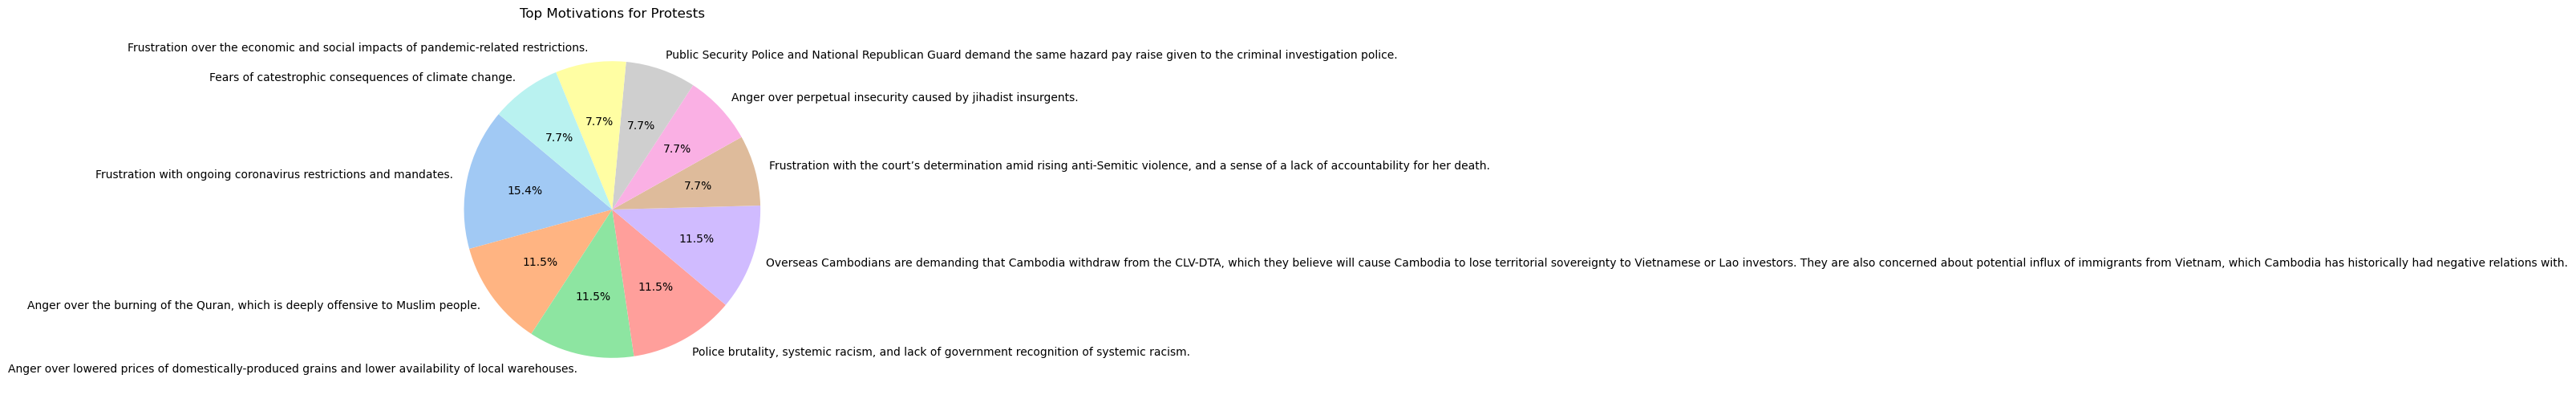

In [9]:
plt.figure(figsize=(10, 6))
motivations.head(10).plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Top Motivations for Protests')
plt.ylabel('')
plt.show()

In [10]:
violent_counts = data['Violent government response'].value_counts()


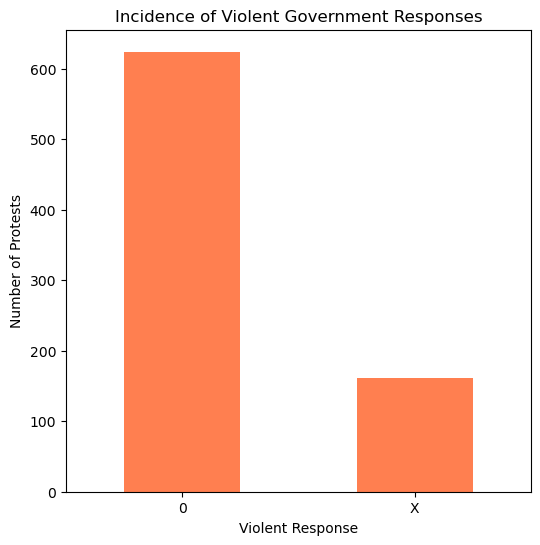

In [11]:
plt.figure(figsize=(6, 6))
violent_counts.plot(kind='bar', color='coral')
plt.title('Incidence of Violent Government Responses')
plt.xlabel('Violent Response')
plt.ylabel('Number of Protests')
plt.xticks(rotation=0)
plt.show()

/tmp/ipykernel_5424/771740048.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  correlation_data = data[['Long protests (more than 3 months)', 'Protests with a significant outcome']].replace({'X': 1, '0': 0}).astype(float)


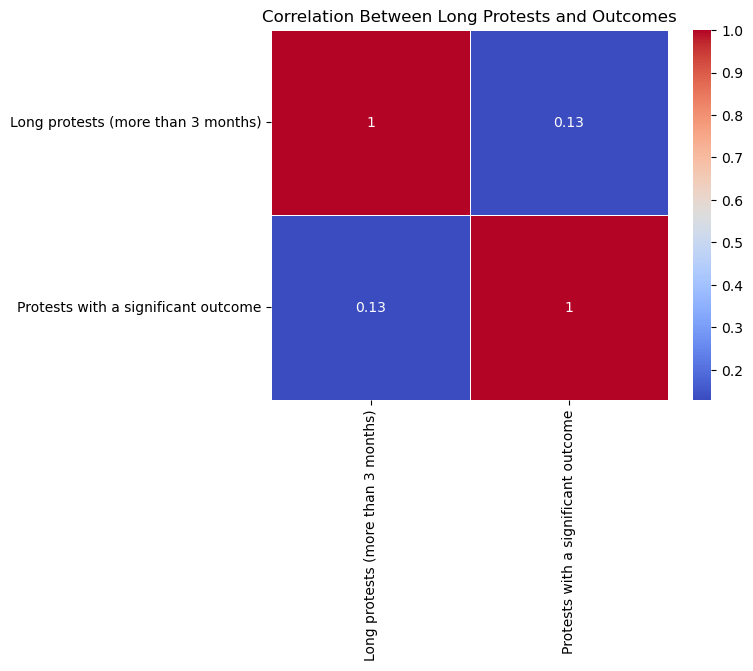

In [12]:
correlation_data = data[['Long protests (more than 3 months)', 'Protests with a significant outcome']].replace({'X': 1, '0': 0}).astype(float)
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Long Protests and Outcomes')
plt.show()